<a href="https://colab.research.google.com/github/sebcalcagno/AnalisisSeriesTemporales/blob/main/CLASE_7/AST_Clase_7_ejercicio_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

UNIVARIATE TIME SERIES FORCASTING =
Ventas por dias


In [ ]:
# univariate lstm example
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from array import array

In [ ]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):

	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		# ej = 110,125,133 es "x" / end_ix= 146
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [ ]:
# define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
# choose a number of time steps
n_steps = 3
# split into samples
# preparo las variables dependientes e independientes.
X, y = prepare_data(timeseries_data, n_steps)

In [ ]:
print(X),print(y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


(None, None)

In [ ]:
X.shape

(6, 3)

In [ ]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1  # para convertir X en una variable de 3 dimensiones.Este valor indica el número de características en la entrada, 
X = X.reshape((X.shape[0], X.shape[1], n_features))


Building LSTM Model

In [ ]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))  # output node 
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=1) # Epoch. Este es el numero de veces que se ejecutaran los algoritmos

Epoch 1/300
1/1 [==============================] - 3s 3s/step - loss: 32680.4629
Epoch 2/300
1/1 [==============================] - 0s 14ms/step - loss: 32629.7598
Epoch 3/300
1/1 [==============================] - 0s 17ms/step - loss: 32578.0078
Epoch 4/300
1/1 [==============================] - 0s 16ms/step - loss: 32525.6094
Epoch 5/300
1/1 [==============================] - 0s 15ms/step - loss: 32472.2754
Epoch 6/300
1/1 [==============================] - 0s 20ms/step - loss: 32417.6094
Epoch 7/300
1/1 [==============================] - 0s 14ms/step - loss: 32361.5020
Epoch 8/300
1/1 [==============================] - 0s 13ms/step - loss: 32304.1406
Epoch 9/300
1/1 [==============================] - 0s 20ms/step - loss: 32245.5391
Epoch 10/300
1/1 [==============================] - 0s 15ms/step - loss: 32184.4980
Epoch 11/300
1/1 [==============================] - 0s 15ms/step - loss: 32121.1738
Epoch 12/300
1/1 [==============================] - 0s 12ms/step - loss: 32055.9297
Epo

Predicting For the next 10 data

In [ ]:
# demonstrate prediction for next 10 days

import numpy as np

x_input = np.array([187, 196, 210])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[225.51183]
1 day input [196.         210.         225.51182556]
1 day output [[237.7898]]
2 day input [210.         225.51182556 237.78979492]
2 day output [[253.26004]]
3 day input [225.51183 237.7898  253.26004]
3 day output [[268.94653]]
4 day input [237.7898  253.26004 268.94653]
4 day output [[284.28613]]
5 day input [253.26004 268.94653 284.28613]
5 day output [[301.39874]]
6 day input [268.94653 284.28613 301.39874]
6 day output [[318.93326]]
7 day input [284.28613 301.39874 318.93326]
7 day output [[337.1729]]
8 day input [301.39874 318.93326 337.1729 ]
8 day output [[356.67038]]
9 day input [318.93326 337.1729  356.67038]
9 day output [[377.0069]]
[225.51183, 237.7898, 253.26004, 268.94653, 284.28613, 301.39874, 318.93326, 337.1729, 356.67038, 377.0069]


In [ ]:
timeseries_data


[110, 125, 133, 146, 158, 172, 187, 196, 210]

In [ ]:
len(timeseries_data)


9

*Visualizaing* The Output


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
day_new=np.arange(1,10)
day_pred=np.arange(10,20)

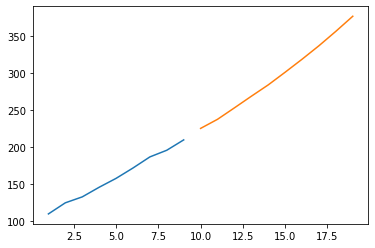

In [ ]:
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)